In [4]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import  cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.model_selection import validation_curve
import datetime

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#import graphviz 
import timeit
import os
from IPython.display import Image

In [5]:
bank_data = pd.read_csv('bank-full.csv', delimiter = ";", header="infer")
len(bank_data)

45211

In [6]:
bank_data = pd.get_dummies(bank_data, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'])

In [7]:
bank_data.y.replace(('yes','no'), (1,0), inplace = True)

In [8]:
y = bank_data['y']
del bank_data['y']


In [9]:
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [10]:

# Train - Test split# Train  
X_train, X_test, y_train, y_test = train_test_split(bank_data, y, test_size  = 0.3)

print("Training dataset size: ", len(X_train))
print("Testing dataset size: ", len(X_test))
print("Training label dataset size: ", len(y_train))
print("Testing label dataset size: ", len(y_test))

Training dataset size:  31647
Testing dataset size:  13564
Training label dataset size:  31647
Testing label dataset size:  13564


In [11]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [11]:

np.random.seed(55)
mlp = MLPClassifier()
hidden_layer_sizes = [5,10,15,(15,15), 20, 40, (40,40), 50, 100]

#hidden_layer_sizes = [(100,), (100, 100), (100,100,100), (100,100,100,100), (500,), (500,500)]
'''
cross_validation_params = {
    'hidden_layer_sizes': [(100,), (100, 100), (100,100,100), (100,100,100,100), (500,), (500,500)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'momentum': [0, 0.5, 0.9]
}
'''


train_scores, test_scores = validation_curve( mlp, X_train, y_train, param_name="hidden_layer_sizes", param_range=hidden_layer_sizes,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=4)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



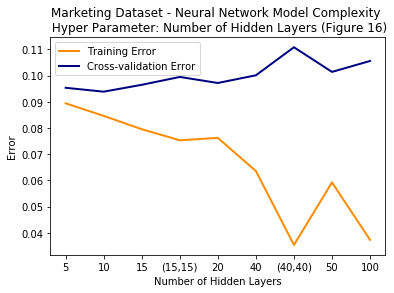

train_scores = [0.91057606 0.91537113 0.92045059 0.9246848  0.92376054 0.93643157
 0.96464119 0.94078426 0.96268209]
test_scores = [0.90463554 0.90612063 0.90349796 0.90049609 0.90280268 0.89986417
 0.88915207 0.89856858 0.89439748]
Optimal param =  10  Minimum Error =   0.09387936919673412


In [12]:
hidden_layer_params = ['5','10','15', '(15,15)', '20', '40', '(40,40)', '50', '100']

plt.title("Marketing Dataset - Neural Network Model Complexity \n Hyper Parameter: Number of Hidden Layers (Figure 16)")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Error")


lw = 2
plt.plot(np.arange(1,10), 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(np.arange(1,10) , 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.xticks(np.arange(1,10), hidden_layer_params)

plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal param = ",  hidden_layer_sizes[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )



### Choose optimal activation parameter


In [13]:

np.random.seed(55)
mlp = MLPClassifier(hidden_layer_sizes = (10,))

activation_param = ['logistic', 'tanh', 'relu']


train_scores, test_scores = validation_curve( mlp, X_train, y_train, param_name="activation", param_range=activation_param,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



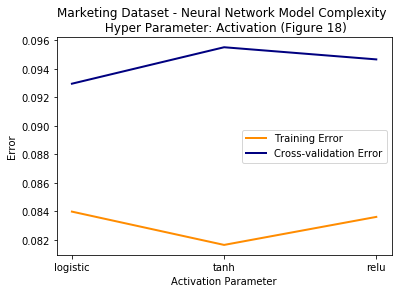

train_scores = [0.9160189  0.91835717 0.91639018]
test_scores = [0.90703704 0.90447754 0.90533063]
Optimal param =  logistic  Minimum Error =   0.09296296268561899


In [14]:
plt.title("Marketing Dataset - Neural Network Model Complexity \n Hyper Parameter: Activation (Figure 18)")

plt.xlabel("Activation Parameter")
plt.ylabel("Error")


lw = 2
plt.plot(activation_param, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(activation_param, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal param = ",  activation_param[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )




In [15]:

np.random.seed(55)
mlp = MLPClassifier(hidden_layer_sizes = (10,), activation = "tanh")

solver_param = ['lbfgs', 'sgd', 'adam']


train_scores, test_scores = validation_curve( mlp, X_train, y_train, param_name="solver", param_range=solver_param,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


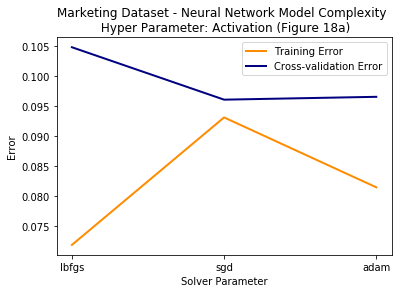

train_scores = [0.92810534 0.9068948  0.91852307]
test_scores = [0.89521925 0.90394037 0.90346635]
Optimal param =  sgd  Minimum Error =   0.09605962872576568


In [16]:
plt.title("Marketing Dataset - Neural Network Model Complexity \n Hyper Parameter: Activation (Figure 18a)")
plt.xlabel("Solver Parameter")
plt.ylabel("Error")


lw = 2
plt.plot(solver_param, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(solver_param , 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal param = ",  solver_param[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )





### Create learning curve - Sample data set size vs. Error

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (100,), activation = "tanh", solver = "adam")

In [ ]:
mlp.fit(X_train,y_train)
mlp.score(X_test,y_test)

In [36]:
np.random.seed(55)
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


#Create timings for Cross validation Set on Adult Income dataset
mlp = MLPClassifier(hidden_layer_sizes = (10,), activation = "tanh", solver = "adam")
train_sizes = np.zeros(10)

i=0
cv_scores=np.zeros(10)
train_scores=np.zeros(10)
    
for sub in training_sizes:
    msk = np.random.rand(len(X_train)) < sub
    smaller_X_train = X_train[msk]
    smaller_y_train = y_train[msk]
    train_sizes[i] = len(smaller_X_train)
    #print("i = " , i)
    sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, 
                                                                            test_size=0.3)
    scores = cross_val_score(mlp , sub_X_train, sub_y_train, cv = 5, scoring = make_scorer(accuracy_score))
    cv_scores[i] = np.mean(scores)
    mlp.fit(sub_X_train, sub_y_train)
    train_scores[i] = mlp.score(sub_X_train, sub_y_train)
    i = i + 1





/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

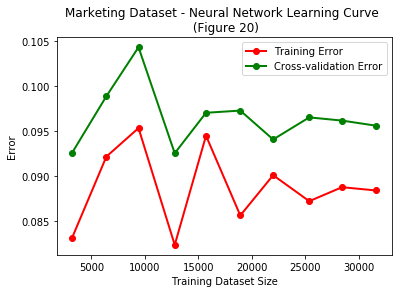

In [37]:
title = "Marketing Dataset - Neural Network Learning Curve \n (Figure 20)"
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")




ax.plot(train_sizes, 1 - train_scores, 'o-', color="r",
             label="Training Error",  lw=lw)
ax.plot(train_sizes, (1- cv_scores), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)


ax.legend(loc="best")

plt.show()



##Create learning curve


train_scores = [0.90288424 0.90807821 0.90688611 0.90833498 0.90714173 0.90630678
 0.90639354 0.90589049 0.90684222 0.90618162]
test_scores = [0.8984737  0.9006541  0.90150727 0.90157038 0.90204433 0.90138088
 0.90258146 0.9030238  0.90359256 0.90450908]
train sizes = [ 2531  5063  7595 10126 12658 15190 17721 20253 22785 25317]


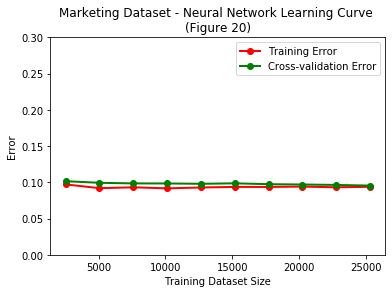

In [12]:
np.random.seed(55)
estimator = MLPClassifier(hidden_layer_sizes = (10,), activation = "tanh", solver = "sgd", learning_rate_init=0.001)
st_train_time = timeit.default_timer() 
estimator.fit(X_train, y_train)
end_train_time = timeit.default_timer()

title = "Marketing Dataset - Neural Network Learning Curve \n(Figure 20)"
ylim=(0.0, 0.3)
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
#cv = StratifiedKFold(y_train, n_folds=10)
#plot_learning_curve(estimator, title, X_train, y_train, , cv=cv, n_jobs=4)



plt.title(title)
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_train, y_train, cv=5, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10), shuffle = True)



train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#test_scores_mean1 = np.mean(test_scores1, axis=1)

print("")
    
lw = 2
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
             label="Training Error",  lw=lw)
plt.plot(train_sizes, (1- test_scores_mean), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)

plt.legend(loc="best")
print("train_scores =", train_scores_mean)
print("test_scores =", test_scores_mean)
print("train sizes =", train_sizes)

plt.show()

In [13]:



st_pred_time = timeit.default_timer() 
y_pred = estimator.predict(X_test)
end_pred_time = timeit.default_timer() 

pred_time = end_pred_time - st_pred_time

print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['y', 'n']))
print("AUC =", roc_auc_score(y_test, y_pred))
print("Prediction Time = ", pred_time)
print("Training Time = ", end_train_time - st_train_time)

#Create timings for Cross-validation set


Accuracy: 90.56325567679151%
[[11607   367]
 [  913   677]]
              precision    recall  f1-score   support

           y       0.93      0.97      0.95     11974
           n       0.65      0.43      0.51      1590

    accuracy                           0.91     13564
   macro avg       0.79      0.70      0.73     13564
weighted avg       0.89      0.91      0.90     13564

AUC = 0.6975682112081417
Prediction Time =  0.006082100000000423
Training Time =  6.975725600000004
